# $Homework \,8 \, (graph \, theory \,model) $

By ShineHale(yunsong Yang) U202115980

This part we will deep into the graph model, which is very important part for us to understand. It has a large number of variants, today we will talk about three interesting task.

First of all, we need to import the related library we will rely on which is going through all the lab.

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from networkx import bipartite    
import queue

## $Experiment \, 1$
Assume that the transmission line network in a certain area is shown in the figure below, the vertices represent the intersection points of streets, and the edges represent streets. The transmission lines are laid out along the streets, and the numerical weights marked on the sides indicate the distance of inspection along the streets. suppose After a storm, an inspector checks every stretch of power line for soundness.

![](./graph.png)

### $Question (a)$
Represent the image on the above as a matrix.

we can change the image little by little, and finally we will have the matrix of the image.

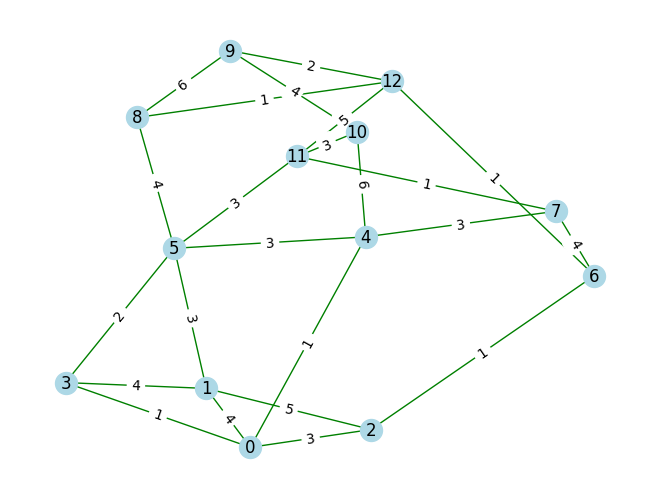

In [2]:
P = np.array([
    [0, 4, 3, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    [4, 0, 5, 4, 0, 3, 0, 0, 0, 0, 0, 0, 0],
    [3, 5, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
    [1, 4, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0],
    [1, 0, 0, 0, 0, 3, 0, 3, 0, 0, 6, 0, 0],
    [0, 3, 0, 2, 3, 0, 0, 0, 4, 0, 0, 3, 0],
    [0, 0, 1, 0, 0, 0, 0, 4, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 3, 0, 4, 0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 4, 0, 0, 0, 6, 0, 0, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 4, 0, 2],
    [0, 0, 0, 0, 6, 0, 0, 0, 0, 4, 0, 3, 0],
    [0, 0, 0, 0, 0, 3, 0, 1, 0, 0, 3, 0, 5],
    [0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 0, 5, 0]
])
G = nx.Graph(P)
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=250, font_size=12, edge_color='green')
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.show()

## $Question\,(b)$
Taking a graph matrix as input, solve the inspector The shortest path and inspection distance to complete the inspection Leave, for the graph has more than two nodes which has add indegree, that is awful, because it means the graph has no euler circuit. we choose to use the DFS and has constriant on the times of the single route.

The shortest path with odd nodes:
k h 3
k i 3
k m 8
k c 10
k d 8
h i 2
h m 6
h c 7
h d 5
i m 6
i c 8
i d 6
m c 2
m d 6
c d 4
True
最短路径为: [('f', 'i'), ('i', 'k'), ('k', 'l'), ('l', 'm'), ('m', 'j'), ('j', 'l'), ('l', 'i'), ('i', 'j'), ('j', 'g'), ('g', 'm'), ('m', 'c'), ('c', 'g'), ('g', 'f'), ('f', 'l'), ('l', 'h'), ('h', 'k'), ('k', 'e'), ('e', 'h'), ('h', 'd'), ('d', 'f'), ('f', 'e'), ('e', 'a'), ('a', 'c'), ('c', 'b'), ('b', 'd'), ('d', 'a'), ('a', 'b'), ('b', 'f')]
最短路径长度为: 88
共经过路径数目: 28


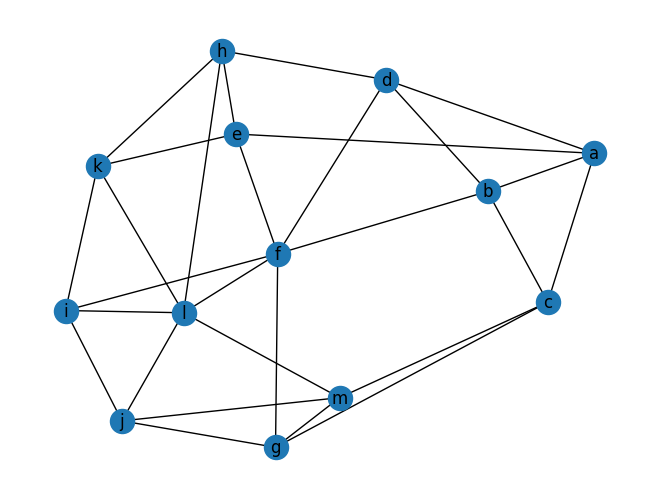

In [3]:
oo = float('inf')
def getShortest(G):
    print("The shortest path with odd nodes:")
    print('k','h',nx.dijkstra_path_length(G, 'k','h'))
    print('k','i',nx.dijkstra_path_length(G, 'k','i'))
    print('k','m',nx.dijkstra_path_length(G, 'k','m'))
    print('k','c',nx.dijkstra_path_length(G, 'k','c'))
    print('k','d',nx.dijkstra_path_length(G, 'k','d'))
    print('h','i',nx.dijkstra_path_length(G, 'h','i'))
    print('h','m',nx.dijkstra_path_length(G, 'h','m'))
    print('h','c',nx.dijkstra_path_length(G, 'h','c'))
    print('h','d',nx.dijkstra_path_length(G, 'h','d'))
    print('i','m',nx.dijkstra_path_length(G, 'i','m'))
    print('i','c',nx.dijkstra_path_length(G, 'i','c'))
    print('i','d',nx.dijkstra_path_length(G, 'i','d'))
    print('m','c',nx.dijkstra_path_length(G, 'm','c'))
    print('m','d',nx.dijkstra_path_length(G, 'm','d'))
    print('c','d',nx.dijkstra_path_length(G, 'c','d'))
    
    return

if __name__ == '__main__':
    
    G = nx.Graph()
    G.add_nodes_from(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i',
                    'j', 'k', 'l', 'm'])

    G.add_weighted_edges_from([('a', 'd', 1),  ('a', 'e', 1), ('a', 'c', 3), ('a', 'b', 4), 
                            ('b', 'c', 5), ('b', 'd', 4), ('b', 'f', 3), ('c', 'g', 1), ('d', 'f', 2), ('e', 'f', 4), ('e', 'k', 6),('e', 'h', 3), ('f', 'l', 3), ('f', 'g', 3), ('f', 'i', 4), ('g', 'j', 4), ('g', 'm', 1), ('h', 'k', 3), ('h', 'l', 1), ('i', 'l', 1), ('i', 'j', 6), ('j', 'l', 4), ('j', 'm', 2), ('k', 'l', 3), ('l', 'm', 5), ('k', 'i', 3), ('d', 'h', 6), ('c', 'm', 2)])
    getShortest(G)
    pos = nx.spring_layout(G)
    print(nx.is_eulerian(G))
    euler = list(nx.eulerian_circuit(G, 'f'))
    path_length = 0
    cnt = 0
    for i in euler:
        cnt += 1
        path_length += G._adj[i[0]][i[1]]['weight']
    print("最短路径为:", euler)
    print("最短路径长度为:", path_length)
    print("共经过路径数目:",cnt)
    
    nx.draw(G, pos, with_labels=True)
    plt.show()

## $Experiment \, 2$

A basketball coach has to figure out a receiving and receiving lineup. It is known that each player can play in the following table. The coach needs to choose: point guard 1, shooting guard 2, small forward 3, power forward 4, center 5. Build a graphical model to find out the feasible sending and receiving lineup.

we can see each player as a point with number, the same for the position on the playground. and the question can be converted to the bipart graph. then all we need to do is find the maximum matching is enough.

In [4]:
labels = {(1,0):'Allen', (1,1):'Bob', (1,2):'Chris', (1,3):'Doug', (1,4):'Eric', (1,5):'Fred', (1,6):'Gale', (1,7):'Head', (0,0):'1', (0,1):'2', (0,2):'3', (0,3):'4', (0,4): '5'}

In [5]:
def plotGraph(graph, title):   
    pos = [(each[1], each[0]) for each in graph.nodes()]
    pos_dict = dict(zip(graph.nodes(), pos))
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(1, 1, 1)
    nx.draw(graph, ax=ax, pos=pos_dict, with_labels=True, font_size=10, node_size = 500, node_color="lightgreen", labels=labels)
    ax.set_title(title)
    return   

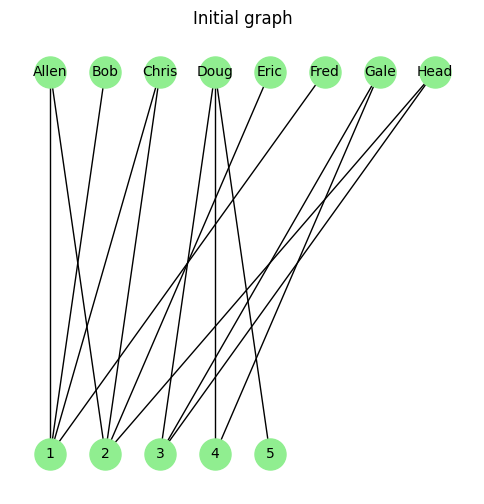

In [6]:
G = nx.Graph()
edges = [
    [(1,0), (0,0)],
    [(1,0), (0,1)],
    [(1,1), (0,0)],
    [(1,2), (0,0)],
    [(1,2), (0,1)],
    [(1,3), (0,2)],
    [(1,3), (0,3)],
    [(1,3), (0,4)],
    [(1,4), (0,1)],
    [(1,5), (0,0)],
    [(1,6), (0,2)],
    [(1,6), (0,3)],
    [(1,7), (0,1)],
    [(1,7), (0,2)]
    ]

for each in edges:
    G.add_node(each[0],bipartite=0)
    G.add_node(each[1],bipartite=1)
G.add_nodes_from(labels)
G.add_edges_from(edges)
plotGraph(G, 'Initial graph')

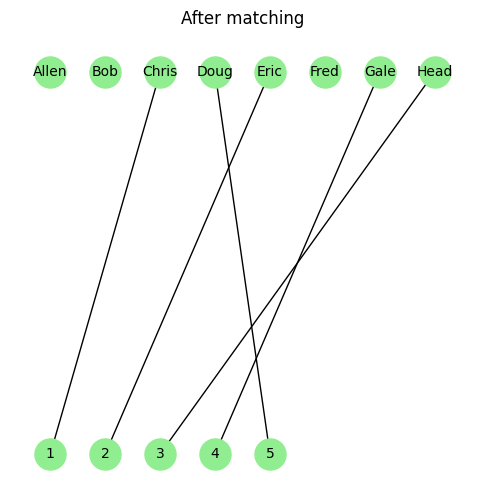

In [7]:
match2 = bipartite.maximum_matching(G)    
G_match2 = nx.Graph()
for kk,vv in match2.items():
    G_match2.add_edge(kk, vv)
G_match2.add_nodes_from(labels)
plotGraph(G_match2, "After matching")

## $Experiment\, 3$

Program for solving the Stable marriage problem.and the input matrix is $(N, N)$ men and women. the datas are as follow:

![](./data.png)

In [8]:
A = np.array([[8, 6, 4, 5, 1, 7, 3, 2],
              [8, 2, 3, 1, 6, 5, 4, 7],
              [5, 2, 1, 7, 6, 8, 3, 4],
              [7, 6, 3, 8, 5, 4, 1, 2],
              [4, 6, 2, 7, 3, 8, 5, 1],
              [4, 5, 8, 6, 3, 7, 1, 2],
              [5, 2, 6, 4, 8, 7, 1, 3],
              [6, 1, 4, 3, 8, 7, 2, 5]])

B = np.array([[4, 3, 8, 1, 5, 2, 6, 7],
              [3, 5, 7, 4, 2, 8, 1, 6],
              [8, 1, 3, 7, 2, 4, 5, 6],
              [7, 3, 1, 8, 5, 4, 2, 6],
              [3, 7, 1, 8, 4, 5, 6, 2],
              [8, 7, 5, 1, 6, 3, 2, 4],
              [4, 7, 8, 3, 2, 6, 5, 1],
              [8, 2, 4, 5, 3, 6, 1, 7]])


In [9]:
def order(B, x, y):
    n = B.shape[1]
    j = 1

    for i in range(n):
        j += 1

        if B[x-1, i] == y:
            break

    return j


def Match(A, B):
    n = A.shape[1]
    B1 = np.zeros(n, dtype=int)
    Q = np.arange(1, n+1)

    while len(Q) != 0:
        m = Q[0]
        Q = Q[1:]

        for i in range(n):
            k = A[m-1, i]

            if B1[k-1] != 0:
                if order(B, k, B1[k-1]) > order(B, k, m):
                    Q = np.append(Q, B1[k-1])
                    B1[k-1] = m
                    break
            else:
                B1[k-1] = m
                break

    a = np.arange(1, n+1)
    D = np.vstack((a, B1))
    return D


[[1 2 3 4 5 6 7 8]
 [1 5 6 7 3 8 4 2]]


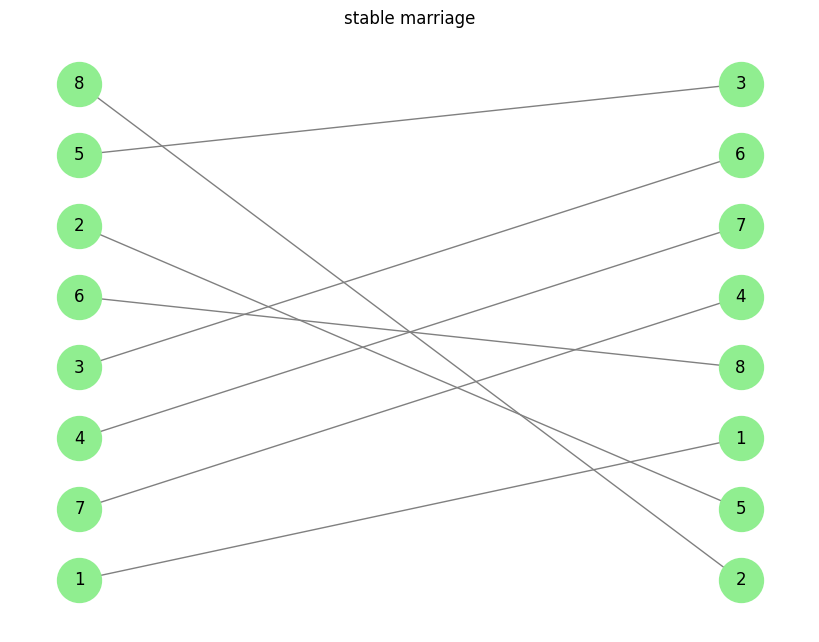

In [10]:
result = Match(A, B)
print(result)
graph = nx.Graph()

labels = {(0, i): i for i in range(1, 9)}
labels.update({(1, i): i for i in range(1, 9)})

left_nodes = []
right_nodes = []
for i in range(8):
    left_nodes.append((0, result[0][i]))
    right_nodes.append((1, result[1][i]))

graph.add_nodes_from(left_nodes, bipartite=0)
graph.add_nodes_from(right_nodes, bipartite=1)

edges = [(left_nodes[i], right_nodes[i]) for i in range(len(left_nodes))]
graph.add_edges_from(edges)

left_nodes = {node: node for node in left_nodes}
right_nodes = {node: node for node in right_nodes}

# 绘制二分图
pos = nx.bipartite_layout(graph, left_nodes)
plt.figure(figsize=(8, 6))
nx.draw(graph, pos, with_labels=True, node_color='lightgreen', edge_color='gray', node_size=1000, labels=labels)
plt.title('stable marriage')
plt.show()